This is an exploration of the results of the CO calibration

In [6]:
import csv
import json
import pandas as pd
import os
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import datetime
import urllib
import numpy as np
import plotly.graph_objects as go

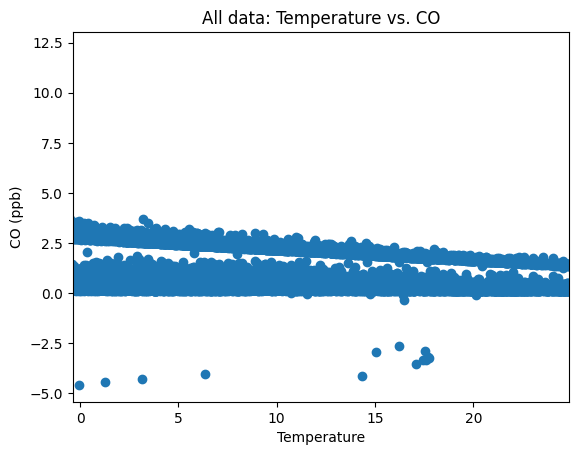

In [18]:

import matplotlib.pyplot as plt


# load data from a CSV file
df = pd.read_csv('corrected_co.csv')


def make_plot(data,title):

    x_min = data['temp'].quantile(0.05) # exclude 5% of lowest values
    x_max = data['temp'].quantile(0.95) # exclude 5% of highest values

    # create a scatter plot
    plt.scatter(data['temp'], data['CO_ppb'])
    plt.xlim(x_min, x_max)

    # add labels and title
    plt.xlabel('Temperature')
    plt.ylabel('CO (ppb)')
    plt.title(title + ': Temperature vs. CO')

    # display the plot
    plt.show()

make_plot(df,'All data')


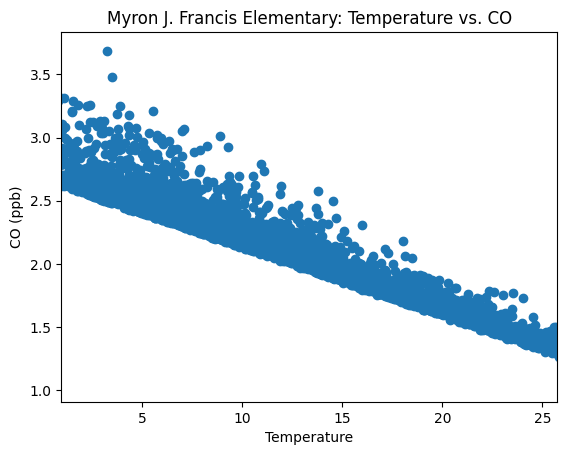

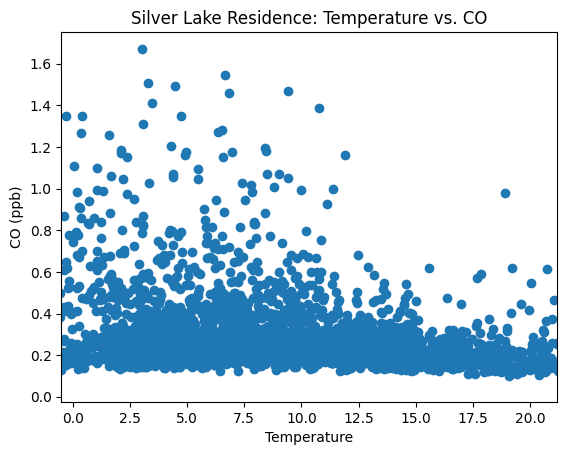

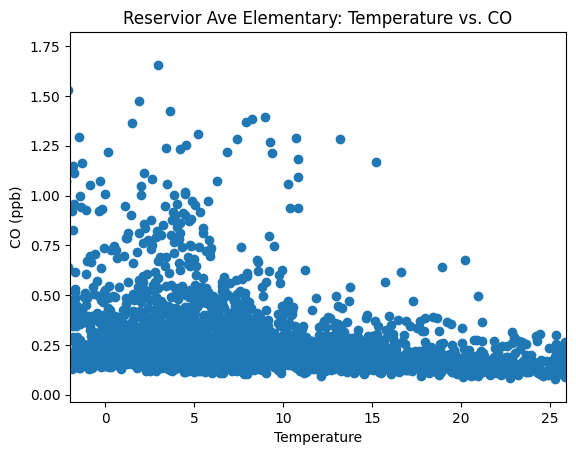

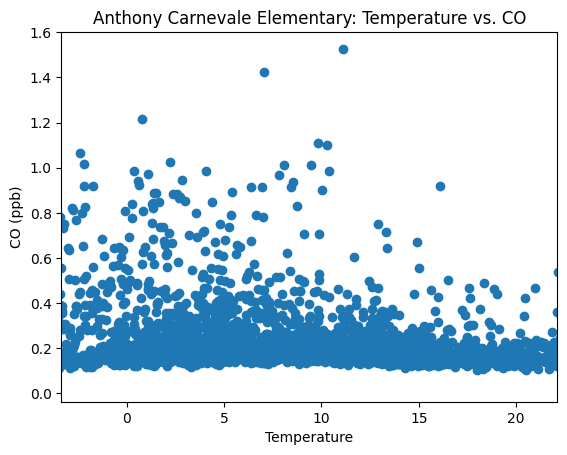

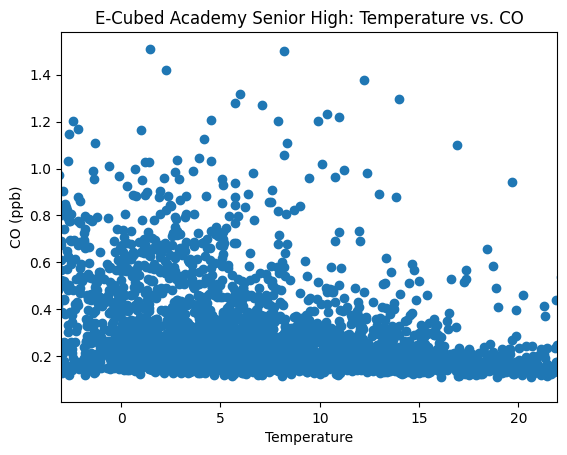

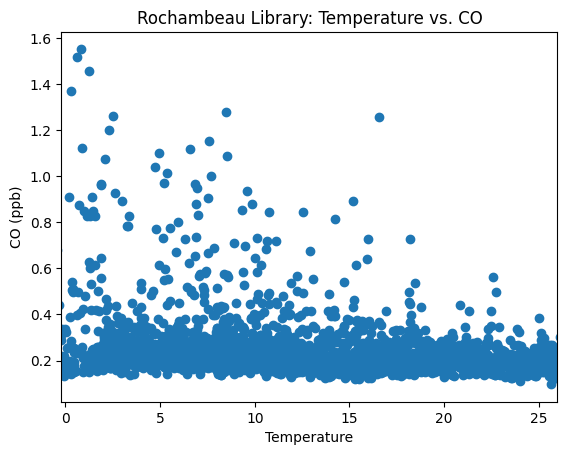

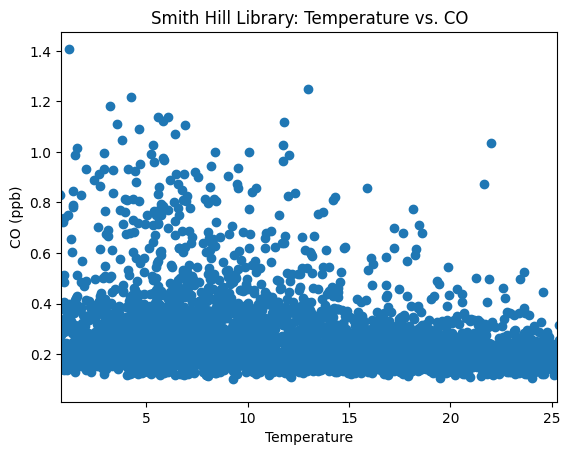

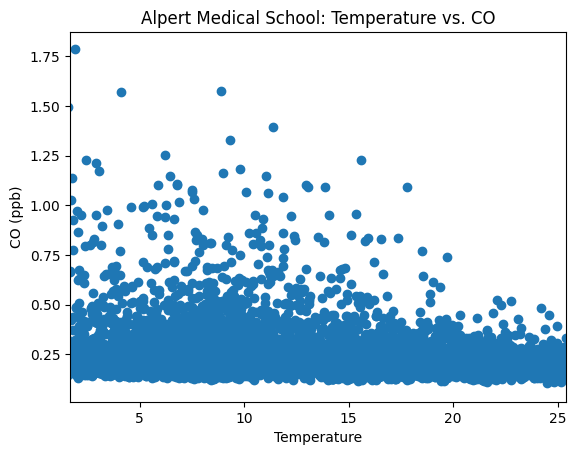

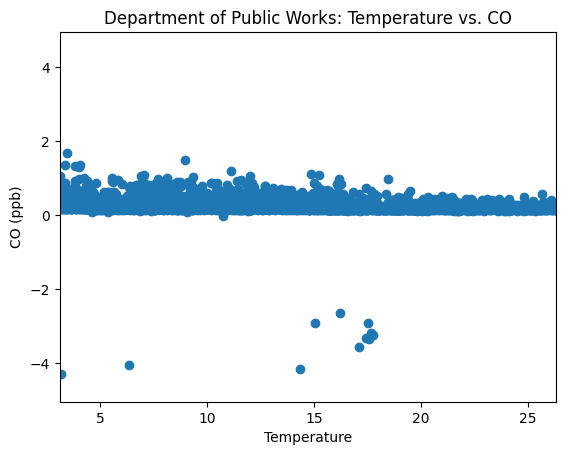

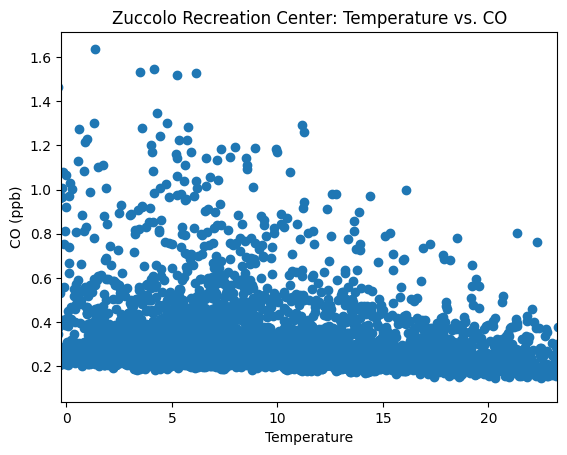

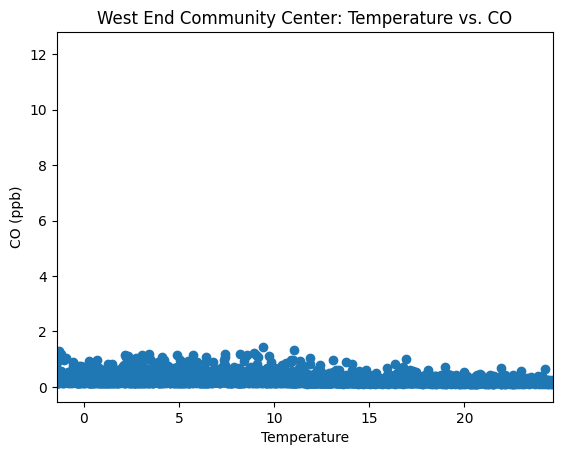

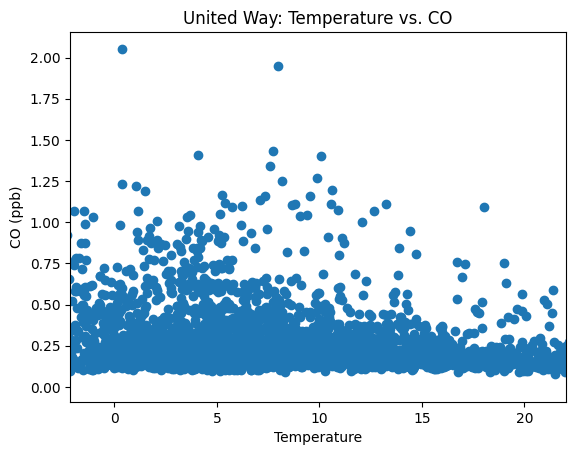

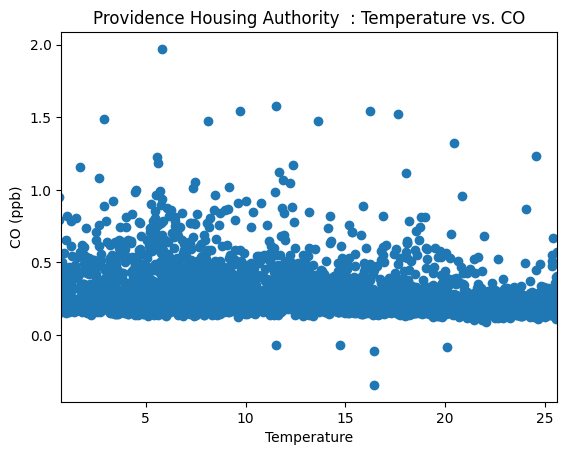

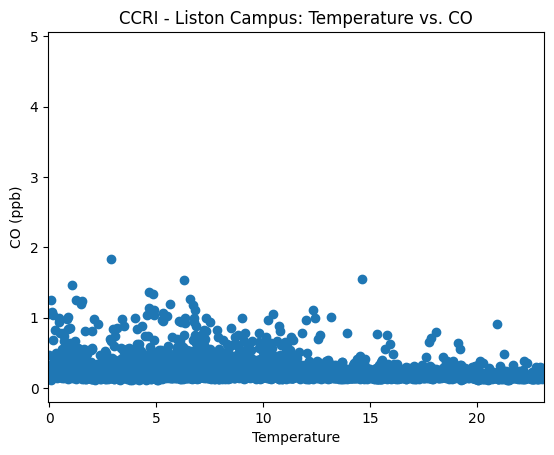

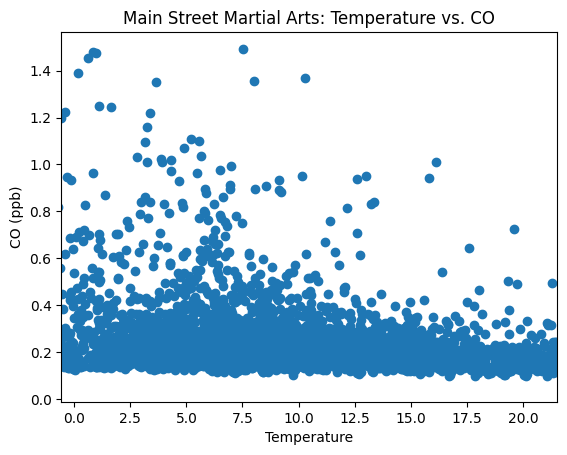

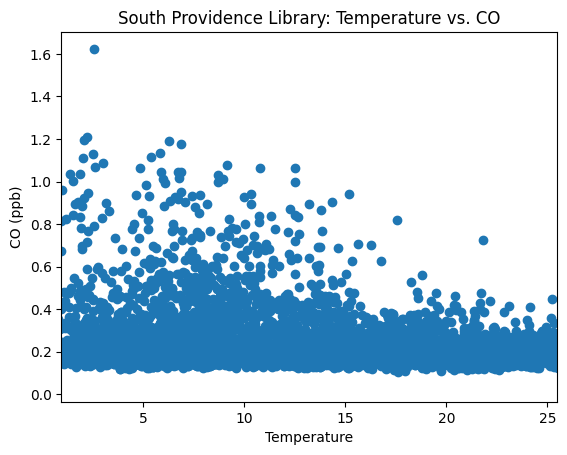

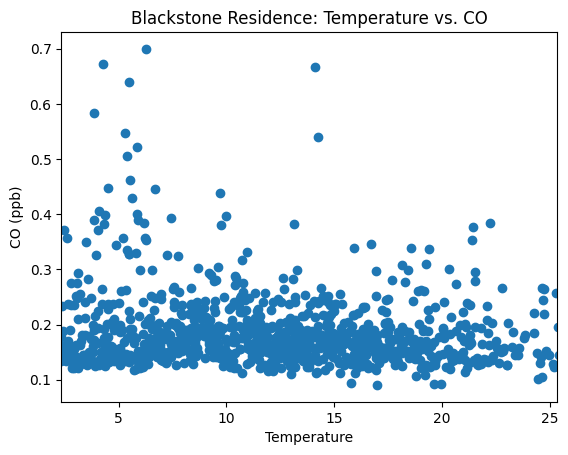

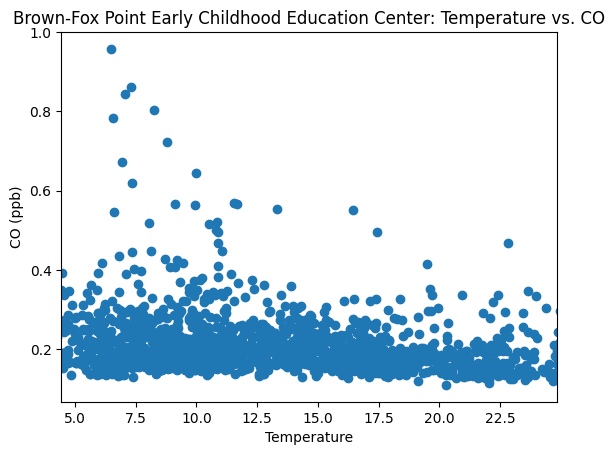

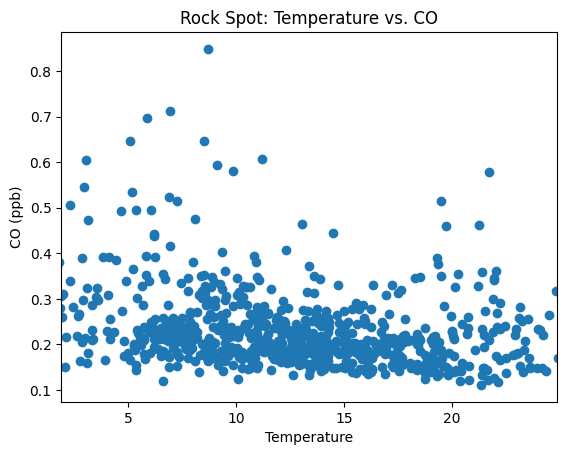

In [26]:
#display the plots for each of the nodes

node_list = pd.read_csv("co_lookup_with_sensors.csv")
node_list = node_list.dropna(subset=['Node ID'])
node_list["Node ID"] = node_list["Node ID"].apply(lambda x: int(str(x)[0:3]))
node_list = list(node_list["Node ID"])

df_nodes = list(df["Node ID"])

for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]

    name = str(node_df["Location"].iloc[0])
    make_plot(node_df,name)
    

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


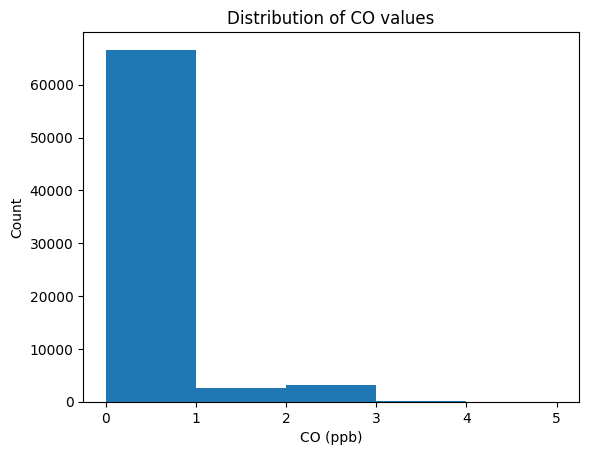

Number of values less than 0.1: 229
Number of values more than 3.0: 136
Mean: 0.39607769118181385
Mean for node 250: 2.119111047273544
Mean for node 254: 0.2829244046266636
Mean for node 258: 0.24909698288206636
Mean for node 261: 0.2358629917125081
Mean for node 264: 0.2824765843945273
Mean for node 267: 0.2457796282965922
Mean for node 270: 0.2491471764937868
Mean for node 274: 0.2614039306568547
Mean for node 276: 0.23345170454156308
Mean for node 251: 0.3155275023887342
Mean for node 252: 0.2522675711310329
Mean for node 255: 0.2604295058172424
Mean for node 257: 0.27339268216335755
Mean for node 259: 0.24139052650122386
Mean for node 262: 0.24776780783339514
Mean for node 263: 0.2515834713105648
Mean for node 266: 0.18892482106493672
Mean for node 269: 0.20902552056927798
Mean for node 268: 0.23158022993881994


In [41]:
# plot the range of values for CO

# create a histogram
bin_edges = [0.0,1.0,2.0, 3.0, 4.0, 5.0]
print(bin_edges)

# create the histogram using matplotlib
plt.hist(df['CO_ppb'], bins=bin_edges)

# add labels and title
plt.xlabel('CO (ppb)')
plt.ylabel('Count')
plt.title('Distribution of CO values')

# display the plot
plt.show()

# Count the amount of values that are less thatn 0.1
print("Number of values less than 0.1: " + str(len(df[df["CO_ppb"] < 0.1])))
print("Number of values more than 3.0: " + str(len(df[df["CO_ppb"] > 3.0])))
print("Mean: " + str(df['CO_ppb'].mean()))


# Get the mean for each sensor
for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]
    print("Mean for node " + str(node) + ": " + str(node_df['CO_ppb'].mean()))


